Import all required libraries

In [1]:
%reset -f
#pip install -U yellowbrick

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
#import umap.umap_ as umap
import matplotlib.pyplot as plt
import seaborn as sns

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from datetime import datetime
from google.colab import files
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import MDS # for MDS dimensionality reduction

In [3]:
#to erase all variables from colab
#%reset -f
#upload files in googledrive and run the below code
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [6]:
data=pd.read_csv('/data.csv',delimiter=';' ,decimal=",")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [7]:
data.info(verbose='max_cols', memory_usage=None, max_cols=None)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 78 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pseudonym       42 non-null     object 
 1   ageGroup        42 non-null     int64  
 2   gender          42 non-null     int64  
 3   bmi             42 non-null     float64
 4   smoker          42 non-null     int64  
 5   employed        42 non-null     int64  
 6   sports          42 non-null     int64  
 7   timeOfDay       42 non-null     int64  
 8   arrival         42 non-null     object 
 9   testSuit        42 non-null     int64  
 10  firstTask       42 non-null     int64  
 11  dist_6mwt       42 non-null     float64
 12  dist_sct        42 non-null     int64  
 13  swe_b_t1        42 non-null     float64
 14  swe_b_t4        42 non-null     float64
 15  swe_m_t1        42 non-null     float64
 16  swe_m_t4        42 non-null     float64
 17  swe_f_t1        42 non-null     float

In [8]:
data.columns

Index(['pseudonym', 'ageGroup', 'gender', 'bmi', 'smoker', 'employed',
       'sports', 'timeOfDay', 'arrival', 'testSuit', 'firstTask', 'dist_6mwt',
       'dist_sct', 'swe_b_t1', 'swe_b_t4', 'swe_m_t1', 'swe_m_t4', 'swe_f_t1',
       'swe_f_t4', 'swe_a_t1', 'swe_a_t4', 'hee_t1', 'hee_t4', 'facts_t1',
       'facts_t4', 'bsa_B', 'bsa_F', 'bsa_S', 'abi_p_vig', 'abi_p_kov',
       'wkv_a_t1', 'wkv_a_t2', 'wkv_a_t3', 'wkv_a_t4', 'wkv_b_t1', 'wkv_b_t2',
       'wkv_b_t3', 'wkv_b_t4', 'wkv_g_t1', 'wkv_g_t2', 'wkv_g_t3', 'wkv_g_t4',
       'wkv_t_t1', 'wkv_t_t2', 'wkv_t_t3', 'wkv_t_t4', 'mood_v_t1',
       'mood_v_t2', 'mood_v_t3', 'mood_v_t4', 'mood_c_t1', 'mood_c_t2',
       'mood_c_t3', 'mood_c_t4', 'mood_ea_t1', 'mood_ea_t2', 'mood_ea_t3',
       'mood_ea_t4', 'panas_pos_t1', 'panas_pos_t2', 'panas_pos_t3',
       'panas_pos_t4', 'panas_neg_t1', 'panas_neg_t2', 'panas_neg_t3',
       'panas_neg_t4', 'swe_6mwt_t1', 'swe_6mwt_t2', 'swe_6mwt_t3',
       'swe_6mwt_t4', 'swe_sct_t1', 'swe_sc

In [9]:
data_sensors=pd.read_csv('/additional_data.csv')

In [10]:
data_sensors.info(verbose='max_cols', memory_usage=None, max_cols=None)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 75 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   id                                         42 non-null     object 
 1   Minimum_of_smartphone_6mwt                 42 non-null     float64
 2   Maximum_of_smartphone_6mwt                 42 non-null     float64
 3   Deviation_of_smartphone_6mwt               42 non-null     float64
 4   Minimum_of_smartphone_sct                  41 non-null     float64
 5   Maximum_of_smartphone_sct                  41 non-null     float64
 6   Deviation_of_smartphone_sct                41 non-null     float64
 7   Minimum_of_fitbit_6mwt                     42 non-null     int64  
 8   Maximum_of_fitbit_6mwt                     42 non-null     int64  
 9   Deviation_of_fitbit_6mwt                   42 non-null     float64
 10  amount_of_confidence_zero_in

In [11]:
#Concatinate acc_data and df
df = pd.concat([data,data_sensors], axis=1)
df.head()

,pseudonym,ageGroup,gender,bmi,smoker,employed,sports,timeOfDay,arrival,testSuit,...,Deviation_of_accerometer_sct_split1_V2,Maximum_of_accelerometer_sct_split2_v2,Minimum_of_accelerometer_sct_split2_v2,Deviation_of_accerometer_sct_split2_V2,Maximum_of_accelerometer_sct_split1_v3,Minimum_of_accelerometer_sct_split1_v3,Deviation_of_accerometer_sct_split1_V3,Maximum_of_accelerometer_sct_split2_v3,Minimum_of_accelerometer_sct_split2_v3,Deviation_of_accerometer_sct_split2_V3
0,0577770a,1,0,26.5,0,1,1,1,public transport,0,...,0.218913,1.089844,-0.167969,0.193908,0.710938,-0.867188,0.200250,0.515625,-0.742188,0.159058
1,10e5b7cd,0,1,25.5,0,1,0,0,on foot,1,...,0.238527,1.968750,-0.234375,0.244791,0.367188,-1.515625,0.246456,0.500000,-1.281250,0.232239
2,14103f09,0,0,22.1,0,1,1,0,car/motorcycle,1,...,0.232167,1.878906,-0.621094,0.234780,0.566406,-1.367188,0.229901,0.390625,-1.832031,0.242459
3,1d5d73b7,1,1,22.1,0,1,1,0,bicycle,1,...,0.273251,0.683594,-1.250000,0.286152,0.511719,-0.859375,0.212292,0.515625,-1.007812,0.209505
4,2319ac8d,1,1,26.0,0,0,1,1,car/motorcycle,0,...,0.196950,0.878906,-0.195312,0.176987,0.539062,-1.144531,0.210882,0.445312,-1.648438,0.215718


In [12]:
#create a dataframe with ParticipantsIDs
df_ID=data[['pseudonym']]

In [13]:
# Gives a bar chart of the missing values
#msno.bar(df)

In [14]:
#count for missing values
lis_col=[col for col in df.columns if df[col].isnull().any()]
for i in lis_col:
  count=df[i].isnull().sum()
  print(i,'=',count)

bsa_B = 18
bsa_F = 7
bsa_S = 13
abi_p_vig = 1
abi_p_kov = 1
swe_6mwt_t1 = 21
swe_6mwt_t2 = 21
swe_6mwt_t3 = 21
swe_6mwt_t4 = 21
swe_sct_t1 = 21
swe_sct_t2 = 21
swe_sct_t3 = 21
swe_sct_t4 = 21
Minimum_of_smartphone_sct = 1
Maximum_of_smartphone_sct = 1
Deviation_of_smartphone_sct = 1


In [15]:
#From the data collection prespective, these are actually not missing values,Its part of the system. 
#So we gather data for each person based on first task (column: firstTask) he/she performed.
data_swe=df[['firstTask','swe_6mwt_t1','swe_6mwt_t2','swe_6mwt_t3', 'swe_6mwt_t4','swe_sct_t1','swe_sct_t2','swe_sct_t3','swe_sct_t4']]
data_swe.head()

,firstTask,swe_6mwt_t1,swe_6mwt_t2,swe_6mwt_t3,swe_6mwt_t4,swe_sct_t1,swe_sct_t2,swe_sct_t3,swe_sct_t4
0,1,NaN,NaN,9.5,9.5,9.0,8.5,NaN,NaN
1,0,5.5,10.0,NaN,NaN,NaN,NaN,8.75,10.0
2,1,NaN,NaN,9.5,10.0,9.0,10.0,NaN,NaN
3,0,9.0,8.0,NaN,NaN,NaN,NaN,10.00,7.0
4,1,NaN,NaN,8.5,10.0,4.5,6.5,NaN,NaN


In [16]:
data_swe['firstTask'].value_counts()

1    21
0    21
Name: firstTask, dtype: int64

In [17]:
#reduce data_ft1 and data_ft0 into four columns with names 6mwtask1,	6mwtask2,	sctask1 and sctask2 based on firstTask column
data_ft1=data_swe[data_swe['firstTask']==1]

In [18]:
data_ft1.head()

,firstTask,swe_6mwt_t1,swe_6mwt_t2,swe_6mwt_t3,swe_6mwt_t4,swe_sct_t1,swe_sct_t2,swe_sct_t3,swe_sct_t4
0,1,NaN,NaN,9.5,9.5,9.0,8.5,NaN,NaN
2,1,NaN,NaN,9.5,10.0,9.0,10.0,NaN,NaN
4,1,NaN,NaN,8.5,10.0,4.5,6.5,NaN,NaN
6,1,NaN,NaN,10.0,10.0,10.0,10.0,NaN,NaN
8,1,NaN,NaN,10.0,9.5,5.0,9.5,NaN,NaN


In [19]:
data_ft0=data_swe[data_swe['firstTask']==0]
data_ft0.head()

,firstTask,swe_6mwt_t1,swe_6mwt_t2,swe_6mwt_t3,swe_6mwt_t4,swe_sct_t1,swe_sct_t2,swe_sct_t3,swe_sct_t4
1,0,5.5,10.0,NaN,NaN,NaN,NaN,8.75,10.0
3,0,9.0,8.0,NaN,NaN,NaN,NaN,10.00,7.0
5,0,5.0,5.0,NaN,NaN,NaN,NaN,9.50,9.5
7,0,8.0,8.0,NaN,NaN,NaN,NaN,9.00,8.0
9,0,9.5,10.0,NaN,NaN,NaN,NaN,9.25,10.0


In [20]:
data_ft1.drop(['swe_6mwt_t1','swe_6mwt_t2','swe_sct_t3','swe_sct_t4'],axis=1,inplace=True)
data_ft0.drop(['swe_6mwt_t3','swe_6mwt_t4','swe_sct_t1','swe_sct_t2'],axis=1,inplace=True)
data_ft1.rename(columns={'swe_6mwt_t3': 'swe_6mwtask_before', 'swe_6mwt_t4': 'swe_6mwtask_after','swe_sct_t1': 'swe_sctask_before','swe_sct_t2': 'swe_sctask_after'}, inplace=True)
data_ft0.rename(columns={'swe_6mwt_t1': 'swe_6mwtask_before', 'swe_6mwt_t2': 'swe_6mwtask_after','swe_sct_t3': 'swe_sctask_before','swe_sct_t4': 'swe_sctask_after'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [21]:
df_task=pd.concat([data_ft0, data_ft1], sort=True)
df_task_sorted=df_task.sort_index()
df_task_sorted.head()

,firstTask,swe_6mwtask_after,swe_6mwtask_before,swe_sctask_after,swe_sctask_before
0,1,9.5,9.5,8.5,9.00
1,0,10.0,5.5,10.0,8.75
2,1,10.0,9.5,10.0,9.00
3,0,8.0,9.0,7.0,10.00
4,1,10.0,8.5,6.5,4.50


In [22]:
df_task_sorted.drop(['firstTask'],axis=1,inplace=True)
df_task_sorted.head()

,swe_6mwtask_after,swe_6mwtask_before,swe_sctask_after,swe_sctask_before
0,9.5,9.5,8.5,9.00
1,10.0,5.5,10.0,8.75
2,10.0,9.5,10.0,9.00
3,8.0,9.0,7.0,10.00
4,10.0,8.5,6.5,4.50


In [23]:
df_task_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   swe_6mwtask_after   42 non-null     float64
 1   swe_6mwtask_before  42 non-null     float64
 2   swe_sctask_after    42 non-null     float64
 3   swe_sctask_before   42 non-null     float64
dtypes: float64(4)
memory usage: 1.6 KB


In [24]:
#concatenate df and df_task_sorted and drop swe_6mwt_t1','swe_6mwt_t2','swe_6mwt_t3','swe_6mwt_t4','swe_sct_t1','swe_sct_t2','swe_sct_t3','swe_sct_t4' and pseudonym'
final_df=pd.concat([df,df_task_sorted],axis=1)
final_df.drop(['swe_6mwt_t1','swe_6mwt_t2','swe_6mwt_t3','swe_6mwt_t4','swe_sct_t1','swe_sct_t2','swe_sct_t3','swe_sct_t4','pseudonym','id'],axis=1,inplace=True)
final_df.head()

,ageGroup,gender,bmi,smoker,employed,sports,timeOfDay,arrival,testSuit,firstTask,...,Maximum_of_accelerometer_sct_split1_v3,Minimum_of_accelerometer_sct_split1_v3,Deviation_of_accerometer_sct_split1_V3,Maximum_of_accelerometer_sct_split2_v3,Minimum_of_accelerometer_sct_split2_v3,Deviation_of_accerometer_sct_split2_V3,swe_6mwtask_after,swe_6mwtask_before,swe_sctask_after,swe_sctask_before
0,1,0,26.5,0,1,1,1,public transport,0,1,...,0.710938,-0.867188,0.200250,0.515625,-0.742188,0.159058,9.5,9.5,8.5,9.00
1,0,1,25.5,0,1,0,0,on foot,1,0,...,0.367188,-1.515625,0.246456,0.500000,-1.281250,0.232239,10.0,5.5,10.0,8.75
2,0,0,22.1,0,1,1,0,car/motorcycle,1,1,...,0.566406,-1.367188,0.229901,0.390625,-1.832031,0.242459,10.0,9.5,10.0,9.00
3,1,1,22.1,0,1,1,0,bicycle,1,0,...,0.511719,-0.859375,0.212292,0.515625,-1.007812,0.209505,8.0,9.0,7.0,10.00
4,1,1,26.0,0,0,1,1,car/motorcycle,0,1,...,0.539062,-1.144531,0.210882,0.445312,-1.648438,0.215718,10.0,8.5,6.5,4.50


In [25]:
#Number of missing values
lis_col=[col for col in final_df.columns if final_df[col].isnull().any()]
for i in lis_col:
  count=final_df[i].isnull().sum()
  print(i,'=',count)

bsa_B = 18
bsa_F = 7
bsa_S = 13
abi_p_vig = 1
abi_p_kov = 1
Minimum_of_smartphone_sct = 1
Maximum_of_smartphone_sct = 1
Deviation_of_smartphone_sct = 1


In [26]:
final_df['bsa_F'].fillna((final_df['bsa_F'].mean()), inplace=True)
final_df['bsa_S'].fillna((final_df['bsa_S'].mean()), inplace=True)
final_df['abi_p_vig'].fillna((final_df['abi_p_vig'].mean()), inplace=True)
final_df['abi_p_kov'].fillna((final_df['abi_p_kov'].mean()), inplace=True)

In [27]:

final_df['Minimum_of_smartphone_sct'].fillna((final_df['Minimum_of_smartphone_sct'].mean()), inplace=True)
final_df['Maximum_of_smartphone_sct'].fillna((final_df['Maximum_of_smartphone_sct'].mean()), inplace=True)
final_df['Deviation_of_smartphone_sct'].fillna((final_df['Deviation_of_smartphone_sct'].mean()), inplace=True)

In [28]:
#Number of missing values
lis_col=[col for col in final_df.columns if final_df[col].isnull().any()]
for i in lis_col:
  count=final_df[i].isnull().sum()
  print(i,'=',count)

bsa_B = 18


In [29]:
#replace NaN values in bsa_B column with zero
final_df['bsa_B'] = final_df['bsa_B'].replace(np.nan, 0)

In [30]:
#Number of missing values
lis_col=[col for col in final_df.columns if final_df[col].isnull().any()]
for i in lis_col:
  count=final_df[i].isnull().sum()
  print(i,'=',count)

In [ ]:
#msno.matrix(final_df)

**Treating categorical values using one-hot encoding**

Following are categories of *arrival* columns and their count-

car/motorcycle      15

on foot             15

public transport     9

bicycle              3

In [31]:
final_df['arrival'].value_counts()

on foot             15
car/motorcycle      15
public transport     9
bicycle              3
Name: arrival, dtype: int64

In [32]:
arrival_mode= final_df[['arrival']]
arrival_mode= pd.get_dummies(arrival_mode, drop_first=True) #change categorical value into numerical value
final_df.drop(['arrival'],axis=1,inplace=True) #drop arrival column

In [33]:
final_data=pd.concat([final_df, arrival_mode], axis = 1) #concatenate the arrival_mode with final_df

In [ ]:
#final_data.to_csv('final_df_wo_corcut.csv')
#files.download('final_df_wo_corcut.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Columns: 149 entries, ageGroup to arrival_public transport
dtypes: float64(128), int64(18), uint8(3)
memory usage: 48.2 KB


**Normalize Data**

The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information.
Reference: https://docs.microsoft.com/en-us/azure/machine-learning/studio-module-reference/normalize-data#module-overview

Apply minmax scaler on dataset

In [35]:
#normalization
#normalize features expect features having binary values and onehot encoded features
to_be_normalized = final_data.copy()

list_of_binary_variables = ['ageGroup', 'gender', 'smoker', 'employed', 'sports', 'timeOfDay', 'testSuit', 
                           'firstTask', 'arrival_car/motorcycle','arrival_on foot','arrival_public transport']
for i in list_of_binary_variables:
    to_be_normalized.drop([i], axis = 1, inplace = True)

In [36]:
not_to_norm=final_data[['ageGroup', 'gender', 'smoker', 'employed', 'sports', 'timeOfDay', 'testSuit',
                        'firstTask', 'arrival_car/motorcycle','arrival_on foot','arrival_public transport']]
#perform MinMax scaler
from sklearn.preprocessing import MinMaxScaler
# create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
norm_data = pd.DataFrame(scaler.fit_transform(to_be_normalized), columns=to_be_normalized.columns)
#concatenate norm_data and not_to_norm
norm_df=pd.concat([not_to_norm, norm_data], axis = 1)

In [37]:
norm_df.head()

,ageGroup,gender,smoker,employed,sports,timeOfDay,testSuit,firstTask,arrival_car/motorcycle,arrival_on foot,...,Maximum_of_accelerometer_sct_split1_v3,Minimum_of_accelerometer_sct_split1_v3,Deviation_of_accerometer_sct_split1_V3,Maximum_of_accelerometer_sct_split2_v3,Minimum_of_accelerometer_sct_split2_v3,Deviation_of_accerometer_sct_split2_V3,swe_6mwtask_after,swe_6mwtask_before,swe_sctask_after,swe_sctask_before
0,1,0,0,1,1,1,0,1,0,0,...,0.214886,0.913079,0.138895,0.144737,0.863489,0.125912,0.928571,0.947368,0.684211,0.818182
1,0,1,0,1,0,0,1,0,0,1,...,0.109244,0.778229,0.254278,0.137218,0.713976,0.335416,1.000000,0.526316,1.000000,0.772727
2,0,0,0,1,1,0,1,1,1,0,...,0.170468,0.809098,0.212939,0.084586,0.561213,0.364674,1.000000,0.947368,1.000000,0.818182
3,1,1,0,1,1,0,1,0,0,0,...,0.153661,0.914703,0.168966,0.144737,0.789816,0.270333,0.714286,0.894737,0.368421,1.000000
4,1,1,0,0,1,1,0,1,1,0,...,0.162065,0.855402,0.165444,0.110902,0.612134,0.288120,1.000000,0.842105,0.263158,0.000000


In [36]:
#download normalized data
from google.colab import files
norm_df.to_csv('norm_data_final.csv') 
files.download('norm_data_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

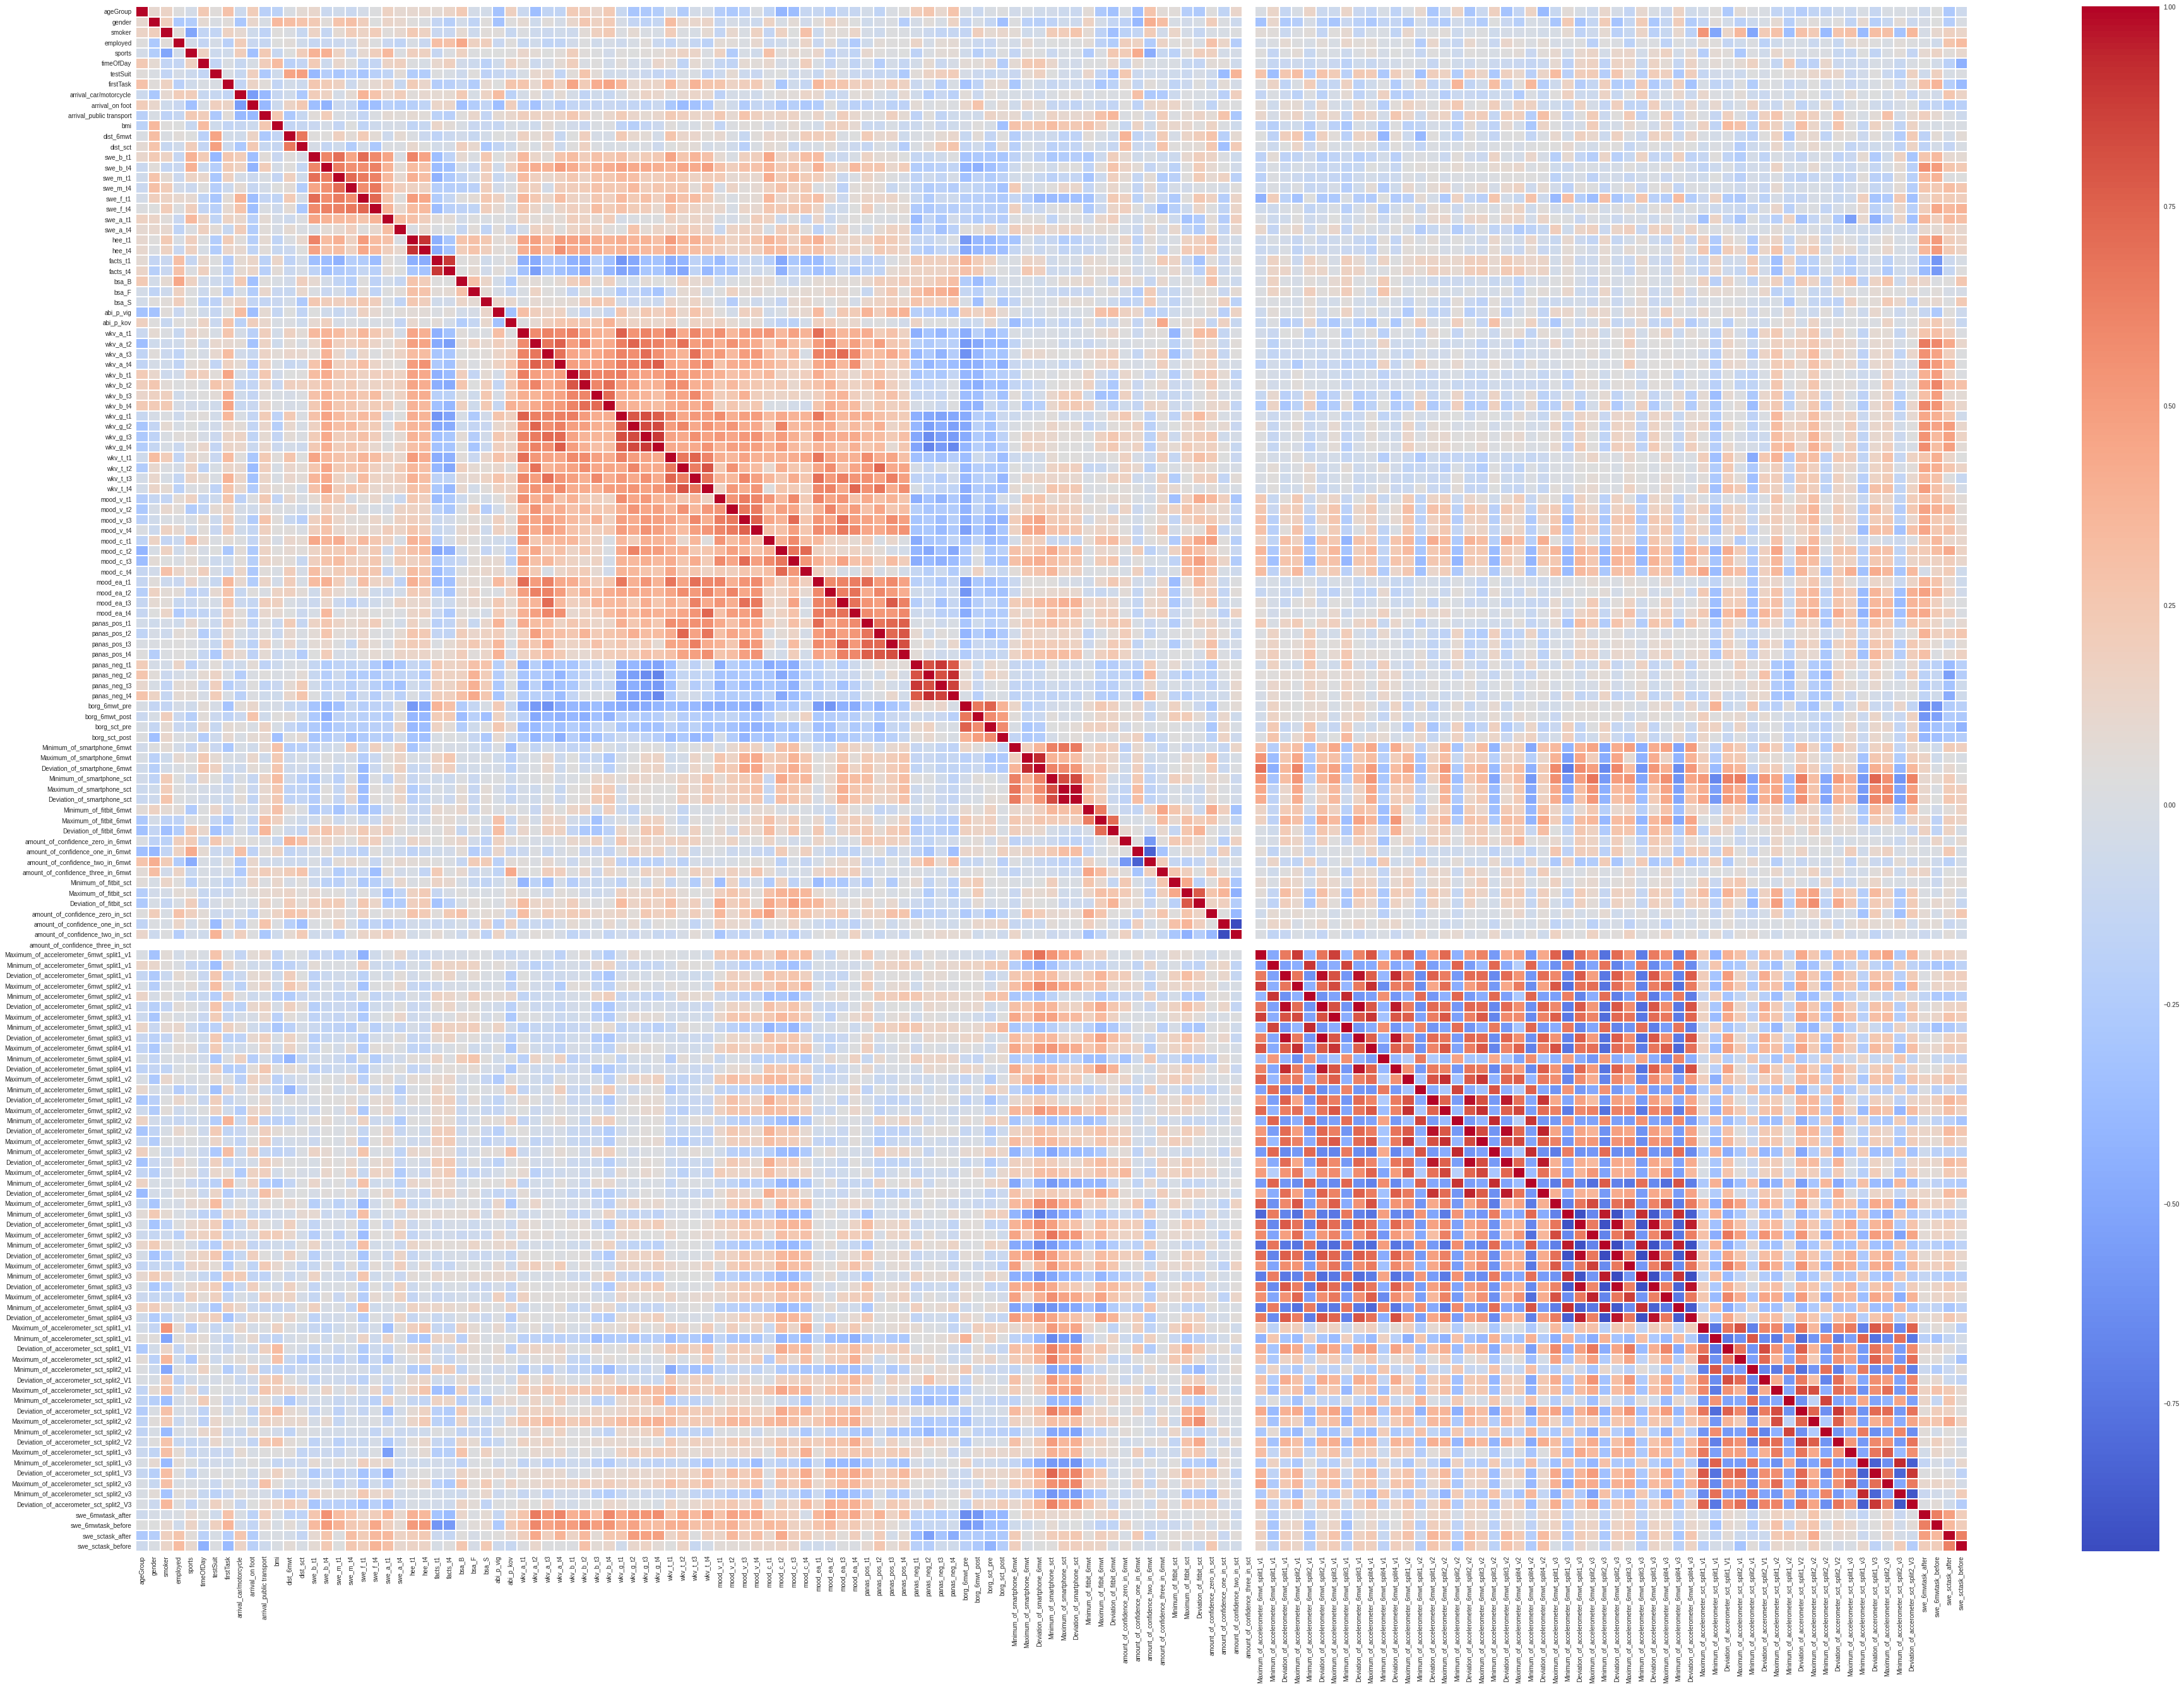

In [38]:
# Finds correlation between attributes
plt.figure(figsize = (65,45))
sns.heatmap(norm_df.corr(), annot = False, cmap = "coolwarm", linecolor = 'white', linewidths = 1)
plt.show()

In [39]:
#Find the highly correlated features.
#Mild reduction of correlated variables (threshold = 0.9)
#need to confirm weather these highly correlated features drop from data set
correlated_features = set() #use set data structure for avoid duplicates
correlation_matrix = norm_df.corr()
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
print(correlated_features)

{'Maximum_of_accelerometer_6mwt_split3_v2', 'Deviation_of_accelerometer_6mwt_split1_v3', 'Deviation_of_accelerometer_6mwt_split2_v3', 'Minimum_of_accelerometer_sct_split2_v3', 'Maximum_of_accelerometer_6mwt_split2_v2', 'Deviation_of_smartphone_6mwt', 'Maximum_of_accelerometer_6mwt_split4_v3', 'Minimum_of_accelerometer_6mwt_split3_v1', 'Maximum_of_accelerometer_6mwt_split4_v1', 'Minimum_of_accelerometer_6mwt_split3_v3', 'Deviation_of_accelerometer_6mwt_split3_v1', 'Deviation_of_accelerometer_6mwt_split2_v2', 'Deviation_of_accelerometer_6mwt_split2_v1', 'hee_t4', 'Minimum_of_accelerometer_6mwt_split3_v2', 'Deviation_of_accelerometer_6mwt_split4_v1', 'panas_neg_t4', 'amount_of_confidence_two_in_sct', 'Deviation_of_accelerometer_6mwt_split3_v2', 'Deviation_of_accelerometer_6mwt_split4_v2', 'Minimum_of_accelerometer_6mwt_split2_v3', 'Deviation_of_accelerometer_6mwt_split4_v3', 'Minimum_of_accelerometer_6mwt_split4_v2', 'Deviation_of_smartphone_sct', 'Minimum_of_accelerometer_6mwt_split4_v3'

In [40]:
print(len(correlated_features))

26


In [41]:
#drop highly correlated data
data_final=norm_df.drop(['Deviation_of_accelerometer_6mwt_split4_v1','hee_t4','Deviation_of_accelerometer_6mwt_split4_v2','Minimum_of_accelerometer_6mwt_split2_v3', 'Deviation_of_accelerometer_6mwt_split2_v1', 'amount_of_confidence_two_in_sct','Deviation_of_smartphone_6mwt', 'Maximum_of_accelerometer_6mwt_split4_v1','Maximum_of_accelerometer_6mwt_split4_v3', 'Deviation_of_accelerometer_6mwt_split4_v3', 
'Minimum_of_accelerometer_6mwt_split3_v1', 'Deviation_of_accelerometer_6mwt_split3_v3', 
'panas_neg_t4', 'Minimum_of_accelerometer_6mwt_split3_v2', 'Minimum_of_accelerometer_6mwt_split4_v3', 
'Deviation_of_accelerometer_6mwt_split3_v2', 'Minimum_of_accelerometer_sct_split2_v3', 
'Deviation_of_accelerometer_6mwt_split2_v2', 'Deviation_of_accelerometer_6mwt_split1_v3', 
'Maximum_of_accelerometer_6mwt_split3_v2', 'Maximum_of_accelerometer_6mwt_split2_v2', 
'Deviation_of_accelerometer_6mwt_split3_v1', 'Minimum_of_accelerometer_6mwt_split4_v2', 
'Deviation_of_smartphone_sct', 'Minimum_of_accelerometer_6mwt_split3_v3', 
'Deviation_of_accelerometer_6mwt_split2_v3'],axis=1)

In [42]:
data_final.head()

,ageGroup,gender,smoker,employed,sports,timeOfDay,testSuit,firstTask,arrival_car/motorcycle,arrival_on foot,...,Deviation_of_accerometer_sct_split2_V2,Maximum_of_accelerometer_sct_split1_v3,Minimum_of_accelerometer_sct_split1_v3,Deviation_of_accerometer_sct_split1_V3,Maximum_of_accelerometer_sct_split2_v3,Deviation_of_accerometer_sct_split2_V3,swe_6mwtask_after,swe_6mwtask_before,swe_sctask_after,swe_sctask_before
0,1,0,0,1,1,1,0,1,0,0,...,0.400822,0.214886,0.913079,0.138895,0.144737,0.125912,0.928571,0.947368,0.684211,0.818182
1,0,1,0,1,0,0,1,0,0,1,...,0.565755,0.109244,0.778229,0.254278,0.137218,0.335416,1.000000,0.526316,1.000000,0.772727
2,0,0,0,1,1,0,1,1,1,0,...,0.533305,0.170468,0.809098,0.212939,0.084586,0.364674,1.000000,0.947368,1.000000,0.818182
3,1,1,0,1,1,0,1,0,0,0,...,0.699820,0.153661,0.914703,0.168966,0.144737,0.270333,0.714286,0.894737,0.368421,1.000000
4,1,1,0,0,1,1,0,1,1,0,...,0.345975,0.162065,0.855402,0.165444,0.110902,0.288120,1.000000,0.842105,0.263158,0.000000


In [43]:
data_final.to_csv('norm_data_final_corcut26.csv')
files.download('norm_data_final_corcut26.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Dimensionality Reduction : Principal Component Analysis



In [49]:
#dimensionality reduction
#from sklearn.decomposition import PCA
# Initialize the algorithm and set the number of PC's
# Obtain the principal components 
pca=PCA(n_components=10)
principal_comp=pca.fit_transform(data_final)
df_pca = pd.DataFrame(data = principal_comp, columns =['pca1','pca2', 'pca3','pca4', 'pca5',
                                                       'pca6', 'pca7','pca8', 'pca9','pca10'])
df_pca.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10
0,-0.283135,-1.097781,0.063837,-0.498517,0.075963,-0.463111,1.024756,0.263095,0.030812,0.366890
1,0.734491,0.306651,0.748241,0.735641,0.176337,-0.572790,-1.260790,1.083549,-0.025235,-0.430385
2,0.015942,0.176811,-0.942625,0.458628,0.362854,-0.119114,-0.104869,-1.275812,-0.190909,0.370681
3,1.171057,-0.227437,0.439758,0.264673,1.327439,1.552966,0.181040,0.683777,-0.997133,1.155039
4,0.713599,-1.297280,0.090085,-1.353648,-0.318103,0.665022,0.078901,-0.634470,-0.609239,-0.693216


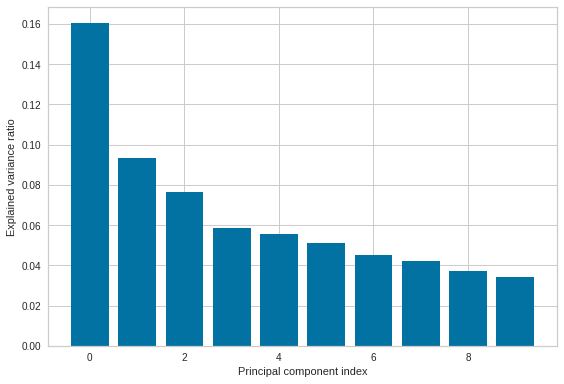

In [50]:
#Explained variance 
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

#Create plot
plt.bar(range(0, len(exp_var_pca)), exp_var_pca, alpha=1,
        align='center', label='Individual explained variance')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.tight_layout()
plt.show()

In [51]:
exp_var_pca

array([0.16047738, 0.09328707, 0.07631443, 0.0585549 , 0.0557653 ,
       0.05118766, 0.04506889, 0.04234722, 0.03734039, 0.03440616])

In [52]:
#most important features
n_pcs = pca.components_.shape[0]
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = data_final.columns
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}
df = pd.DataFrame(dic.items())
df 

,0,1
0,PC0,wkv_a_t4
1,PC1,firstTask
2,PC2,arrival_car/motorcycle
3,PC3,testSuit
4,PC4,timeOfDay
5,PC5,gender
6,PC6,timeOfDay
7,PC7,firstTask
8,PC8,testSuit
9,PC9,arrival_public transport


In [53]:
#Decide to go with only 2 components:
df_pca.drop(df_pca.columns[[2, 3, 4, 5, 6, 7, 8, 9]], axis = 1, inplace = True)
df_pca.head()

,pca1,pca2
0,-0.283135,-1.097781
1,0.734491,0.306651
2,0.015942,0.176811
3,1.171057,-0.227437
4,0.713599,-1.297280


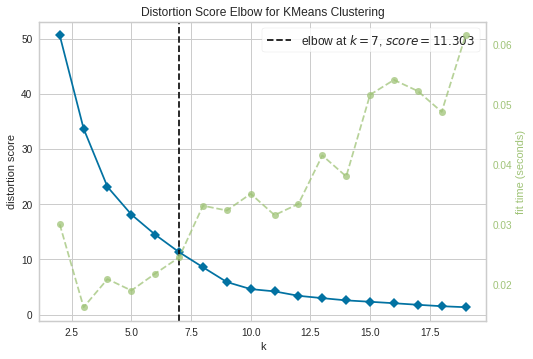

In [55]:
#from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
np.random.seed(0)
visualizer = KElbowVisualizer(model, k=(2,20), timings= True)
visualizer.fit(df_pca)        # Fit data to visualizer
visualizer.show() 

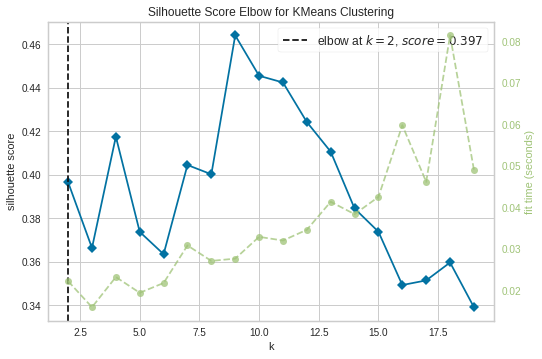

In [56]:
# Silhouette Score for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,20),metric='silhouette', timings= True)
visualizer.fit(df_pca)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

    clusterCount       gap
0            1.0 -2.608076
1            2.0 -2.604028
2            3.0 -2.667876
3            4.0 -2.780505
4            5.0 -2.759871
5            6.0 -2.891345
6            7.0 -2.766500
7            8.0 -2.782411
8            9.0 -2.464399
9           10.0 -2.540173
10          11.0 -2.508312
11          12.0 -2.491485
12          13.0 -2.508382
13          14.0 -2.404990
14          15.0 -2.481520
15          16.0 -2.621340
16          17.0 -2.373255
17          18.0 -2.576753
18          19.0 -2.732613


17

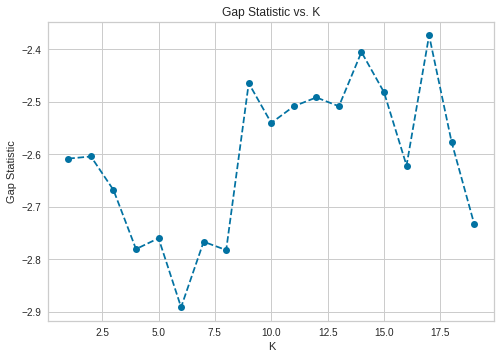

In [57]:
# Gap Statistic for K means
def optimalK(data, nrefs=3, maxClusters=20):
    """
    Calculates KMeans optimal K using Gap Statistic 
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):
# Holder for reference dispersion results
        refDisps = np.zeros(nrefs)
# For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp
# Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_
# Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)
# Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
    print(resultsdf)
    return (gaps.argmax() + 1, resultsdf)
score_g, df = optimalK(df_pca, nrefs=3, maxClusters=20)
plt.plot(df['clusterCount'], df['gap'], linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Gap Statistic');
plt.title('Gap Statistic vs. K');
score_g

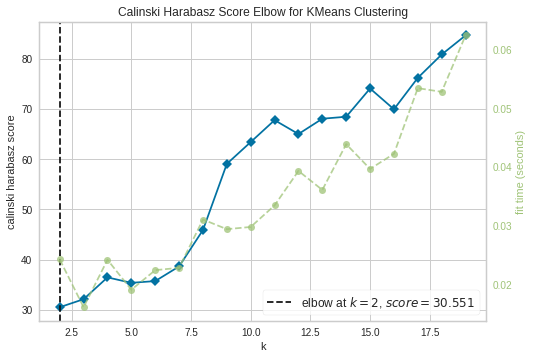

In [58]:
# Calinski Harabasz Score for K means
# Import ElbowVisualizer
#from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,20),metric='calinski_harabasz', timings= True)
visualizer.fit(df_pca)        # Fit the data to the visualizer
visualizer.show() 

In [59]:
#So we consider optimal number of clusters as 2.
#k=2
#Apply kmeans clustering algorithms
kmeans = KMeans(2)
#Apply kMeans on data
kmeans.fit(df_pca)
labels = kmeans.labels_ #label/ cluster associating to each data points
#this is centroid of all clusters
kmeans.cluster_centers_.shape
#create a data frame having kmeans centroid and col of df1
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df_pca.columns])
#cluster_centers
y_kmeans = kmeans.fit_predict(df_pca)

In [60]:
# concatenate the clusters labels to our original dataframe(final_data)
df_cluster = pd.concat([final_data, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster.head()

,ageGroup,gender,bmi,smoker,employed,sports,timeOfDay,testSuit,firstTask,dist_6mwt,...,Minimum_of_accelerometer_sct_split2_v3,Deviation_of_accerometer_sct_split2_V3,swe_6mwtask_after,swe_6mwtask_before,swe_sctask_after,swe_sctask_before,arrival_car/motorcycle,arrival_on foot,arrival_public transport,cluster
0,1,0,26.5,0,1,1,1,0,1,421.00,...,-0.742188,0.159058,9.5,9.5,8.5,9.00,0,0,1,0
1,0,1,25.5,0,1,0,0,1,0,600.00,...,-1.281250,0.232239,10.0,5.5,10.0,8.75,0,1,0,1
2,0,0,22.1,0,1,1,0,1,1,689.00,...,-1.832031,0.242459,10.0,9.5,10.0,9.00,1,0,0,0
3,1,1,22.1,0,1,1,0,1,0,654.55,...,-1.007812,0.209505,8.0,9.0,7.0,10.00,0,0,0,1
4,1,1,26.0,0,0,1,1,0,1,512.00,...,-1.648438,0.215718,10.0,8.5,6.5,4.50,1,0,0,1


In [63]:
#check correlation of labels with the initial set
corr_table = df_cluster.corr(method='pearson')
pd.set_option('display.max_rows', None, 'display.max_columns', None)
corr_table[abs(corr_table) > 0.5]['cluster']

ageGroup                                          NaN
gender                                            NaN
bmi                                               NaN
smoker                                            NaN
employed                                          NaN
sports                                            NaN
timeOfDay                                         NaN
testSuit                                          NaN
firstTask                                         NaN
dist_6mwt                                         NaN
dist_sct                                          NaN
swe_b_t1                                          NaN
swe_b_t4                                    -0.513395
swe_m_t1                                          NaN
swe_m_t4                                          NaN
swe_f_t1                                          NaN
swe_f_t4                                          NaN
swe_a_t1                                          NaN
swe_a_t4                    

In [70]:
# concatenate the clusters labels to participantsID dataset(df_ID)
df_id_cluster = pd.concat([df_ID, pd.DataFrame({'cluster_PCA_KMeans':labels})], axis = 1)

In [ ]:
#df_id_cluster.head()
#from google.colab import files
#download  data
#df_id_cluster.to_csv('ID_clusters_pca_kmeans.csv')
#files.download('ID_clusters_pca_kmeans.csv')

visualizing clustered data

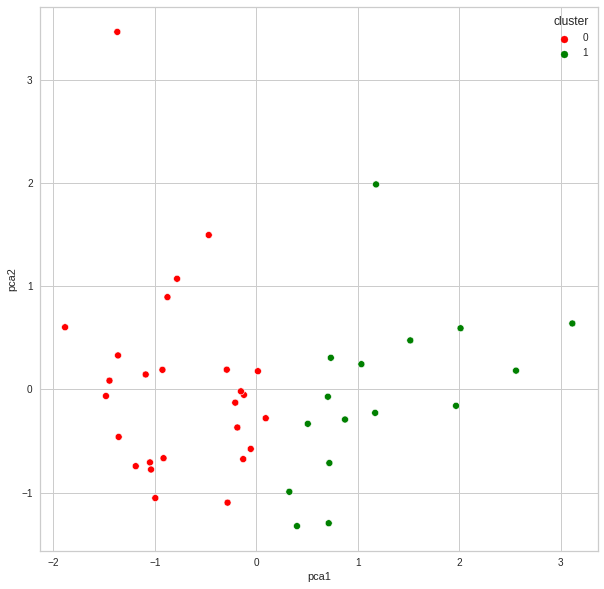

In [64]:
# Concatenate the clusters labels to the dataframe(df_pca)
df_pca = pd.concat([df_pca,pd.DataFrame({'cluster':labels})], axis = 1)
#visualize the clusters using principal components
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = df_pca, palette =['red','green'])
plt.show()
#plt.title('PCA Based Clustering')
#plt.savefig("Pictures/output.jpg")

**Apply HAC Algorithm**

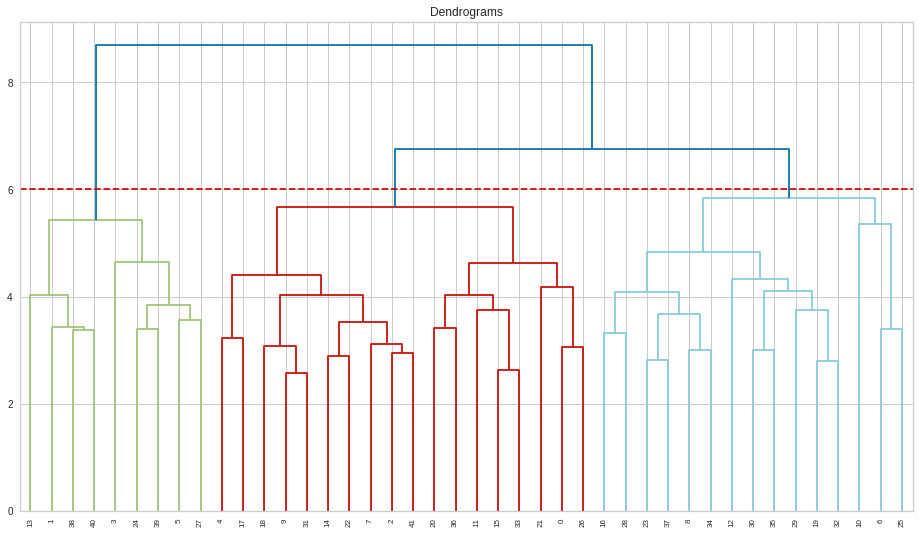

In [65]:
#implement heirarchical clustering. #provide normalized data(data_final) instead of df_pca
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(16, 9))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_final, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

In [66]:
#based on colour , we can decide optimal number of cluster. Or draw a horizontal line over blue line find count of intercet points
optimal_num_clusters=len(set(dend['color_list']))-1
print(optimal_num_clusters) 

3


In [67]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
y_hc=cluster.fit_predict(df_pca)
#0 represents the points that belong to the first cluster and 1 represents points in the second cluster.

In [68]:
y_hc

array([2, 0, 2, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 0, 2, 2, 1, 0, 0, 1, 0, 0,
       2, 2, 0, 1, 2, 0, 1, 1, 2, 2, 2, 2, 1, 2, 0, 2, 0, 0, 0, 2])

In [73]:
# Concatenate the clusters labels to the dataframe(df_cluster)
df_pca_cpy=df_cluster.copy()
df_pca_cpy.drop(['cluster'],axis=1,inplace=True)
df_pca_hac = pd.concat([df_pca_cpy,pd.DataFrame({'cluster_hac':y_hc})], axis = 1)

In [74]:
#check correlation of labels with the initial set
corr_table = df_pca_hac.corr(method='pearson')
pd.set_option('display.max_rows', None, 'display.max_columns', None)
corr_table[abs(corr_table) > 0.5]['cluster_hac']

ageGroup                                          NaN
gender                                            NaN
bmi                                               NaN
smoker                                            NaN
employed                                          NaN
sports                                            NaN
timeOfDay                                         NaN
testSuit                                          NaN
firstTask                                         NaN
dist_6mwt                                         NaN
dist_sct                                          NaN
swe_b_t1                                          NaN
swe_b_t4                                          NaN
swe_m_t1                                          NaN
swe_m_t4                                          NaN
swe_f_t1                                          NaN
swe_f_t4                                          NaN
swe_a_t1                                          NaN
swe_a_t4                    

In [71]:
# concatenate the clusters labels to participantsID dataset(df_ID)
df_id_cluster = pd.concat([df_ID, pd.DataFrame({'cluster_PCA_HAC':y_hc})], axis = 1)

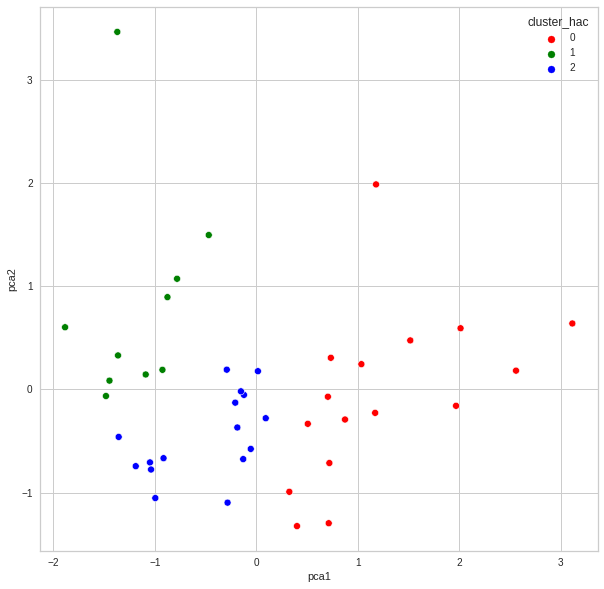

In [76]:
plt.figure(figsize=(10,10))
df_pca_cpy=df_pca.copy()
df_pca_cpy.drop(['cluster'],axis=1,inplace=True)
df_pca_hac = pd.concat([df_pca_cpy,pd.DataFrame({'cluster_hac':y_hc})], axis = 1)
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster_hac", data = df_pca_hac, palette =['red','green','blue'])
plt.show()

**Apply DBSCAN Algorithm**

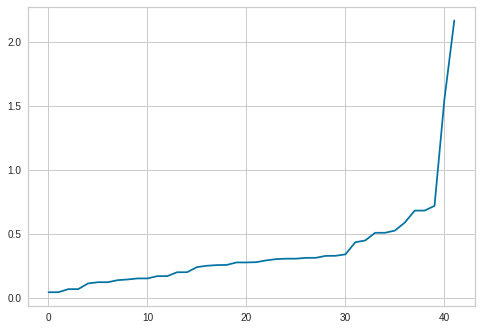

In [77]:
#DBSCAN, let's find appropriate epsilon:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df_pca_cpy)
distances, indices = nbrs.kneighbors(df_pca_cpy)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [ ]:
#print(distances)

Text(0.5, 1.0, 'DBSCAN on PCA')

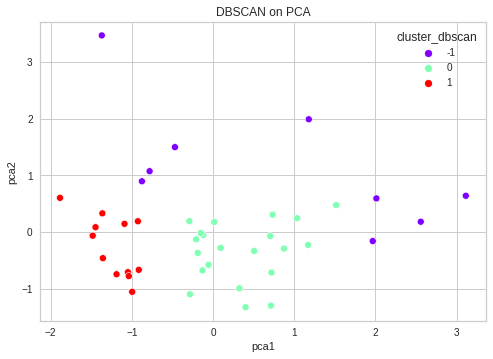

In [78]:
db = DBSCAN(eps=0.625, min_samples=5).fit(df_pca_cpy)
y_dbscan=db.labels_
df_pca_dbscan = pd.concat([df_pca_cpy,pd.DataFrame({'cluster_dbscan':y_dbscan})], axis = 1)
a = sns.scatterplot(x='pca1', y='pca2', hue = 'cluster_dbscan', data = df_pca_dbscan, palette = 'rainbow')
a.set_title('DBSCAN on PCA')

In [79]:
#Correlation check
df_pca_cpy=df_cluster.copy()
df_pca_cpy.drop(['cluster'],axis=1,inplace=True)
df_pca_hac = pd.concat([df_pca_cpy,pd.DataFrame({'cluster_dbscan':y_dbscan})], axis = 1)
corr_table = df_pca_hac.corr(method='pearson')
pd.set_option('display.max_rows', None, 'display.max_columns', None)
corr_table[abs(corr_table) > 0.5]['cluster_dbscan']


ageGroup                                          NaN
gender                                            NaN
bmi                                               NaN
smoker                                            NaN
employed                                          NaN
sports                                            NaN
timeOfDay                                         NaN
testSuit                                          NaN
firstTask                                         NaN
dist_6mwt                                         NaN
dist_sct                                          NaN
swe_b_t1                                          NaN
swe_b_t4                                     0.538575
swe_m_t1                                          NaN
swe_m_t4                                          NaN
swe_f_t1                                          NaN
swe_f_t4                                          NaN
swe_a_t1                                          NaN
swe_a_t4                    

In [80]:
# concatenate the clusters labels to participantsID dataset(df_ID)
df_id_cluster = pd.concat([df_ID, pd.DataFrame({'cluster_PCA_DBSCAN':y_dbscan})], axis = 1)

Apply Gaussian misture clustering

In [82]:
#Gaussian misture, let's choose the proper number of clusters:
from sklearn.mixture import GaussianMixture
from sklearn import metrics
for i in range(2, 11):
    gmm = GaussianMixture(n_components=i).fit(df_pca_cpy)
    df_pca_cpy['Cluster'] = gmm.predict(df_pca_cpy)
    d = metrics.silhouette_score(df_pca_cpy, df_pca_cpy['Cluster'], metric='euclidean')
    print(i, d)

2 0.6713523394977846
3 0.6690428855907802
4 0.3864716933924949
5 0.35221268118990007
6 0.27188497668673994
7 0.2634417071129782
8 0.31322830625752385
9 0.28965945856007125
10 0.3212705957569737


In [ ]:
#the first "kick" is between 2 and 3, so 2 is optimal number 

Text(0.5, 1.0, 'Gaussian mixture on PCA')

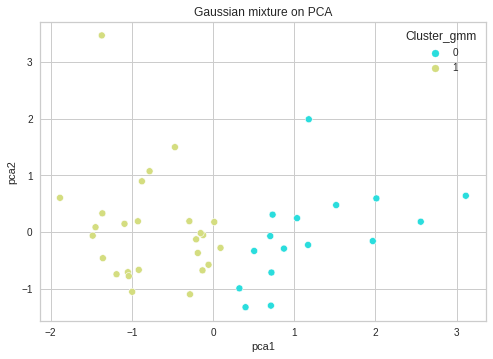

In [83]:
gmm = GaussianMixture(n_components=2)
gmm.fit(df_pca)
df_pca['Cluster_gmm'] = gmm.predict(df_pca)
ax = sns.scatterplot(x='pca1', y='pca2', hue = 'Cluster_gmm', data = df_pca, palette = 'rainbow')
ax.set_title('Gaussian mixture on PCA')

In [89]:
#Correlation check
df_pca_cpy=df_cluster.copy()
df_pca_gmm = pd.concat([df_pca_cpy,pd.DataFrame({'cluster_gmm': df_pca['Cluster_gmm']})], axis = 1)
corr_table = df_pca_hac.corr(method='pearson')
pd.set_option('display.max_rows', None, 'display.max_columns', None)
corr_table[abs(corr_table) > 0.5]['cluster_gmm']

ageGroup                                          NaN
gender                                            NaN
bmi                                               NaN
smoker                                            NaN
employed                                          NaN
sports                                            NaN
timeOfDay                                         NaN
testSuit                                          NaN
firstTask                                         NaN
dist_6mwt                                         NaN
dist_sct                                          NaN
swe_b_t1                                          NaN
swe_b_t4                                     0.513395
swe_m_t1                                          NaN
swe_m_t4                                          NaN
swe_f_t1                                          NaN
swe_f_t4                                          NaN
swe_a_t1                                          NaN
swe_a_t4                    

In [90]:
df_pca.drop(['cluster'],axis=1,inplace=True)

In [91]:
# concatenate the clusters labels to participantsID dataset(df_ID)
df_id_cluster = pd.concat([df_ID, pd.DataFrame({'cluster_PCA_GMM':df_pca['Cluster_gmm']})], axis = 1)


In [92]:
cluster_assigned= pd.concat([df_ID,pd.DataFrame({'cluster_PCA_KMeans':labels}),
                             pd.DataFrame({'cluster_PCA_HAC':y_hc}),
                             pd.DataFrame({'cluster_PCA_DBSCAN':y_dbscan}), 
                             pd.DataFrame({'cluster_PCA_GMM':df_pca['Cluster_gmm']})], axis = 1)

In [93]:
cluster_assigned

,pseudonym,cluster_PCA_KMeans,cluster_PCA_HAC,cluster_PCA_DBSCAN,cluster_PCA_GMM
0,0577770a,0,2,0,1
1,10e5b7cd,1,0,0,0
2,14103f09,0,2,0,1
3,1d5d73b7,1,0,0,0
4,2319ac8d,1,0,0,0
5,2a8310f7,1,0,-1,0
6,2ac72c3c,0,1,1,1
7,2b9ffa95,0,2,0,1
8,32548257,0,1,1,1
9,458409e7,1,0,0,0


In [94]:
cluster_assigned.to_csv('cluster_assigned_v1.csv')
files.download('cluster_assigned_v1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>